

```
# c) (20 points) Optimizer evaluation
• Implement a neural network which has single hidden layer with 32 units. Using the network, find best hyper-parameters of the following optimizers; SGD,
RMSprop, Adam, Adagrad.
• Train the network with the training dataset (not sub training) with the best
hyper-parameters of each optimizer.
• For each optimizer, report test accuracy using the test dataset.
```



In [7]:
#from mnist import MNIST
import os
#import numpy as np

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers


(X_train, y_train), (X_test, y_test) = mnist.load_data()

#mndata = MNIST('mnist')

#X_train, y_train = mndata.load_training()
#X_test, y_test = mndata.load_testing()


In [8]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

np.shape(X_test)

(10000, 784)

In [9]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

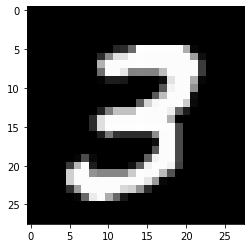

3


In [10]:
import matplotlib.pyplot as plt
import numpy as np

id = 7

image = np.array(X_train[id], dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# print(X_train[id])
print(y_train[id])

Training the Optimizers with the set of best hyperparameters identified in the previous step(last file)..



```
# SGD Optimizer
```



In [21]:
model1 = Sequential()
model1.add(Dense(32, Activation('relu'), input_shape=(784,)))
model1.add(Dense(10, Activation('softmax')))

sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model1.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 2s 3ms/step - loss: 1.3949 - accuracy: 0.6314
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6559 - accuracy: 0.8384
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4943 - accuracy: 0.8686
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4278 - accuracy: 0.8827
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8909
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3658 - accuracy: 0.8972
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.9014
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.9054
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3226 - accuracy: 0.9084
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3128 - accuracy: 0.9110




```
# RMSProp Optimizer
```



In [22]:
model2 = Sequential()
model2.add(Dense(32, Activation('relu'), input_shape=(784,)))
model2.add(Dense(10, Activation('softmax')))

rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model2.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

model2.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


469/469 [==============================] - 2s 3ms/step - loss: 0.4528 - accuracy: 0.8814
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2519 - accuracy: 0.9283
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2112 - accuracy: 0.9396
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1829 - accuracy: 0.9470
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1633 - accuracy: 0.9534
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1470 - accuracy: 0.9579
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1349 - accuracy: 0.9611
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1245 - accuracy: 0.9640
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1159 - accuracy: 0.9672
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1087 - accuracy: 0.9686




```
# Adam Optimizer
```



In [23]:
model3 = Sequential()
model3.add(Dense(32, Activation('relu'), input_shape=(784,)))
model3.add(Dense(10, Activation('softmax')))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model3.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


469/469 [==============================] - 2s 3ms/step - loss: 0.4876 - accuracy: 0.8699
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2344 - accuracy: 0.9336
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1907 - accuracy: 0.9456
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1652 - accuracy: 0.9527
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1471 - accuracy: 0.9576
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1328 - accuracy: 0.9612
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1218 - accuracy: 0.9647
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1124 - accuracy: 0.9674
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1043 - accuracy: 0.9695
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0972 - accuracy: 0.9715




```
# Adagrad Optimizer
```



In [24]:
model4 = Sequential()
model4.add(Dense(32, Activation('relu'), input_shape=(784,)))
model4.add(Dense(10, Activation('softmax')))

adagrad = optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
model4.compile(loss='categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])

model4.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


469/469 [==============================] - 2s 3ms/step - loss: 0.8369 - accuracy: 0.7882
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8883
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.9021
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3214 - accuracy: 0.9104
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3015 - accuracy: 0.9160
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2866 - accuracy: 0.9202
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2745 - accuracy: 0.9233
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2645 - accuracy: 0.9262
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2555 - accuracy: 0.9286
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2477 - accuracy: 0.9311


Displaying the test accuracy's of all the optimizer's

In [25]:
score = model1.evaluate(X_test, Y_test)
print('Test accuracy SGD Optimizer:', score[1]*100)

score = model2.evaluate(X_test, Y_test)
print('Test accuracy RMSProp Optimizer:', score[1]*100)

score = model3.evaluate(X_test, Y_test)
print('Test accuracy Adam Optimizer:', score[1]*100)

score = model4.evaluate(X_test, Y_test)
print('Test accuracy Adagrad Optimizer:', score[1]*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.2970 - accuracy: 0.9165
Test accuracy SGD Optimizer: 91.64999723434448
313/313 [==============================] - 1s 2ms/step - loss: 0.1315 - accuracy: 0.9622
Test accuracy RMSProp Optimizer: 96.21999859809875
313/313 [==============================] - 1s 2ms/step - loss: 0.1204 - accuracy: 0.9643
Test accuracy Adam Optimizer: 96.42999768257141
313/313 [==============================] - 1s 1ms/step - loss: 0.2369 - accuracy: 0.9320
Test accuracy Adagrad Optimizer: 93.19999814033508
